In [36]:
import math

import numpy as np
from cartopy import crs
from cartopy.feature import COLORS, NaturalEarthFeature
from matplotlib import pyplot
from matplotlib.cm import get_cmap
from matplotlib.colors import from_levels_and_colors
from netCDF4 import Dataset
from scipy.interpolate import griddata
from wrf import (
    CoordPair,
    cartopy_xlim,
    cartopy_ylim,
    get_cartopy,
    getvar,
    interpline,
    latlon_coords,
    to_np,
    vertcross,
)
from scipy.integrate import quad

In [37]:
def func(x):
    return x**2  # The function to integrate

result, error = quad(func, 0, 1)  # Integrate from x=0 to x=1
print(result)  # Print the result

0.33333333333333337


In [76]:
def get(wrf_file,times):
    u = getvar(wrf_file, "ua",  timeidx = times)
    v = getvar(wrf_file, "va", timeidx = times)
    w = getvar(wrf_file, "wa", timeidx = times)
    ht = getvar(wrf_file, "z", timeidx=times)
    vice = getvar(wrf_file, "QNICE", timeidx=times)
    qice = getvar(wrf_file, "QNICE", timeidx=times)#kg/kg
    dice = getvar(wrf_file, "D_ICE", timeidx=times)*1000
    t = getvar(wrf_file, "tk", timeidx=times)
    p = getvar(wrf_file, "PB", timeidx=times)
    return u, v, w, ht, vice, qice, dice, t, p

In [77]:
mean_iwp = np.zeros(24)
mean_iwp_t = np.zeros(24)
for i in range(19, 20):
    for j in range(0,12):
        if i==18:
            times_t = j
            times_c = j
            timeout = j+12
        elif i==19:
            times_t = j
            times_c = j
            timeout = j
       #wrf_file_t = Dataset("/glade/scratch/mingzhu/High_res/WRF/300out_turb_sierra/wrfout_d03_2006-01-18_12:00:00")
       #wrf_file_c = Dataset("/glade/scratch/mingzhu/High_res/WRF/300out_cont_sierra/wrfout_d03_2006-01-18_12:00:00")
        wrf_file_t = Dataset("/glade/scratch/mingzhu/High_res/WRF_test/run_ysu_turb/wrfout_d03_2006-01-19_00:00:00")
        wrf_file_c = Dataset("/glade/scratch/mingzhu/High_res/WRF_test/run_ysu_cont/wrfout_d03_2006-01-19_00:00:00")
        u, v, w, ht, vice, qice, dice, t, p = get(wrf_file_c, times_c)
        u_t, v_t, w_t, ht_t, vice_t, qice_t, dice_t, t_t, p_t = get(wrf_file_t, times_t)
        #change the air density unity kg/m2 to g/m2

        den_air = p/(287.04*t)
        den_air_t = p_t/(287.04*t_t)
        #print(ht)
        iwp = 0
        iwp_t = 0
        #print(ht[60, :, :])
        for k in range(1, 60):
            dz = ht[k, :, :]-ht[k-1, :, :]
            dz_t = ht_t[k, :, :]-ht_t[k-1, :, :]
            iwp = qice[k, :, :]*den_air[k, :, :]*dz + iwp
            iwp_t = qice_t[k, :, :]*den_air_t[k, :, :]*dz_t + iwp_t
        mean_iwp[j+12] = np.mean(iwp)
        mean_iwp_t[j+12] = np.mean(iwp_t)
#print(mean_iwp)            

In [78]:
for i in range(18, 19):
    for j in range(0,12):
        if i==18:
            times_t = j
            times_c = j
            timeout = j+12
        elif i==19:
            times_t = j
            times_c = j
            timeout = j
       #wrf_file_t = Dataset("/glade/scratch/mingzhu/High_res/WRF/300out_turb_sierra/wrfout_d03_2006-01-18_12:00:00")
       #wrf_file_c = Dataset("/glade/scratch/mingzhu/High_res/WRF/300out_cont_sierra/wrfout_d03_2006-01-18_12:00:00")
        wrf_file_t = Dataset("/glade/scratch/mingzhu/High_res/WRF_test/run_ysu_turb/wrfout_d03_2006-01-18_12:00:00")
        wrf_file_c = Dataset("/glade/scratch/mingzhu/High_res/WRF_test/run_ysu_cont/wrfout_d03_2006-01-18_12:00:00")
        u, v, w, ht, vice, qice, dice, t, p = get(wrf_file_c, times_c)
        u_t, v_t, w_t, ht_t, vice_t, qice_t, dice_t, t_t, p_t = get(wrf_file_t, times_t)
        #change the air density unity kg/m2 to g/m2

        den_air = p/(287.04*t)
        den_air_t = p_t/(287.04*t_t)
        #print(ht)
        iwp = 0
        iwp_t = 0
        #print(ht)
        for k in range(1, 60):
            dz = ht[k, :, :]-ht[k-1, :, :]
            dz_t = ht_t[k, :, :]-ht_t[k-1, :, :]
            iwp = qice[k, :, :]*den_air[k, :, :]*dz + iwp
            iwp_t = qice_t[k, :, :]*den_air_t[k, :, :]*dz_t + iwp_t
        mean_iwp[j] = np.mean(iwp)
        mean_iwp_t[j] = np.mean(iwp_t)

Text(0.5, 0, 'Time')

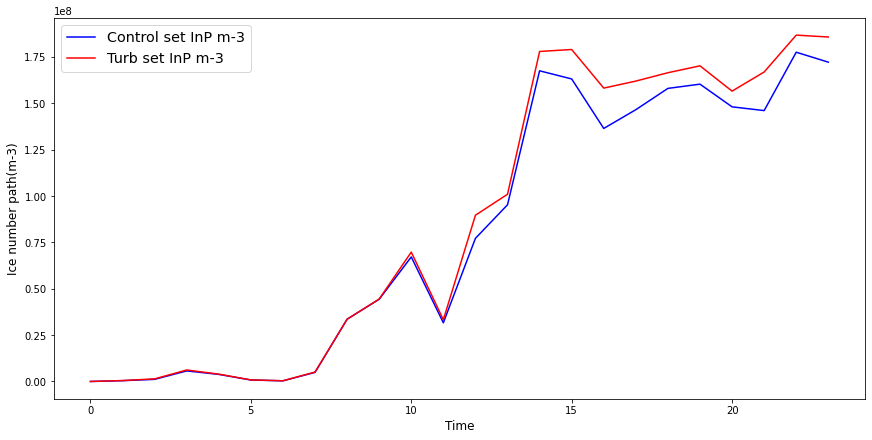

In [79]:
fig,(ax_iwp) = pyplot.subplots(figsize=(12, 6), constrained_layout=True)
#time = np.array([1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 
#                 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911])
time = np.arange(0, 24)
iwp_contours = ax_iwp.plot(time, mean_iwp, "b", label = 'Control set InP m-3')
iwp_contours_t = ax_iwp.plot(time, mean_iwp_t, "r", label = 'Turb set InP m-3')
ax_iwp.legend(loc = 'best', fontsize = 'x-large')
ax_iwp.set_ylabel("Ice number path(m-3)", fontsize=12)
ax_iwp.set_xlabel("Time", fontsize=12)